In [1]:
import pandas as pd
import numpy as np
import os
from utils import *
from utils.data_prep import data_cleaning as dc
from utils.data_prep import data_structuring as ds
import seaborn as sns
import matplotlib.pyplot as plt

#### Preprocessing

In [5]:
path = os.getcwd()

In [6]:
df_train=pd.read_csv(path + '/datasets/train_FD001.txt',sep="\s+",header=None)
df_test=pd.read_csv(path + '/datasets/test_FD001.txt',sep="\s+",header=None)
df_rul = pd.read_csv(path + '/datasets/RUL_FD001.txt',sep="\s+",header=None)

In [7]:
#Columns defined in the dataset readme file 
columns = ['unit_number', 'time_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']

In [8]:
df_train.columns = columns
df_test.columns = columns

In [9]:
df_train.head()

,unit_number,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [10]:
# Check to see if there are any columns with null values
check_nulls = dc.columns_with_null(df_train)
check_nulls

[]

In [12]:
#Selecting relevant features/columns based on how many unique values they have.
df_train = dc.feature_selection(df_train)

In [13]:
#Adding the max time cycles for each unit
df_train = ds.add_max_cycles_column(df_train, 'unit_number', 'time_cycles')

In [15]:
#Insert RUL column
df_train = ds.calculate_rul_column(df_train, 'max_time_cycles', 'time_cycles')

In [16]:
df_train.head()

,unit_number,time_cycles,op_setting_1,op_setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,...,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,max_time_cycles,rul
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,...,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,...,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,...,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,...,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,...,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,192,187


##### Visualization

Text(10.050000000000011, 0.5, 'count of units')

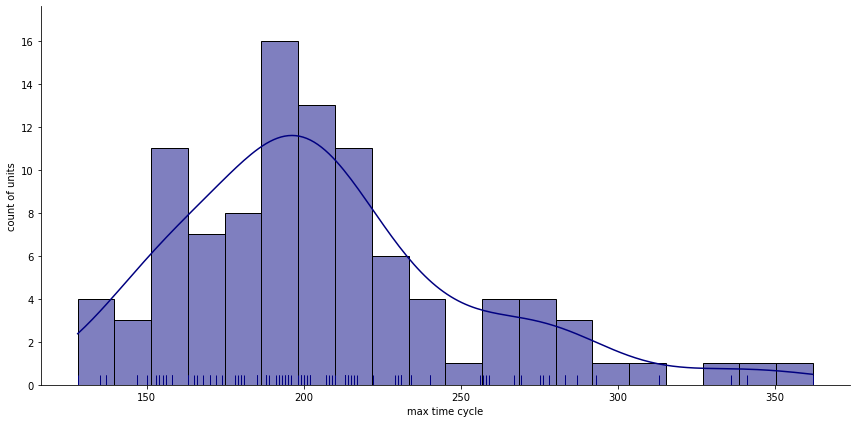

In [39]:
max_cycles = df_train[['unit_number', 'time_cycles']].groupby('unit_number', as_index=False).max()
sns.displot(max_cycles['time_cycles'],kde=True,bins=20,height=6,aspect=2, color='navy', rug=True)
plt.xlabel('max time cycle')
plt.ylabel('count of units')

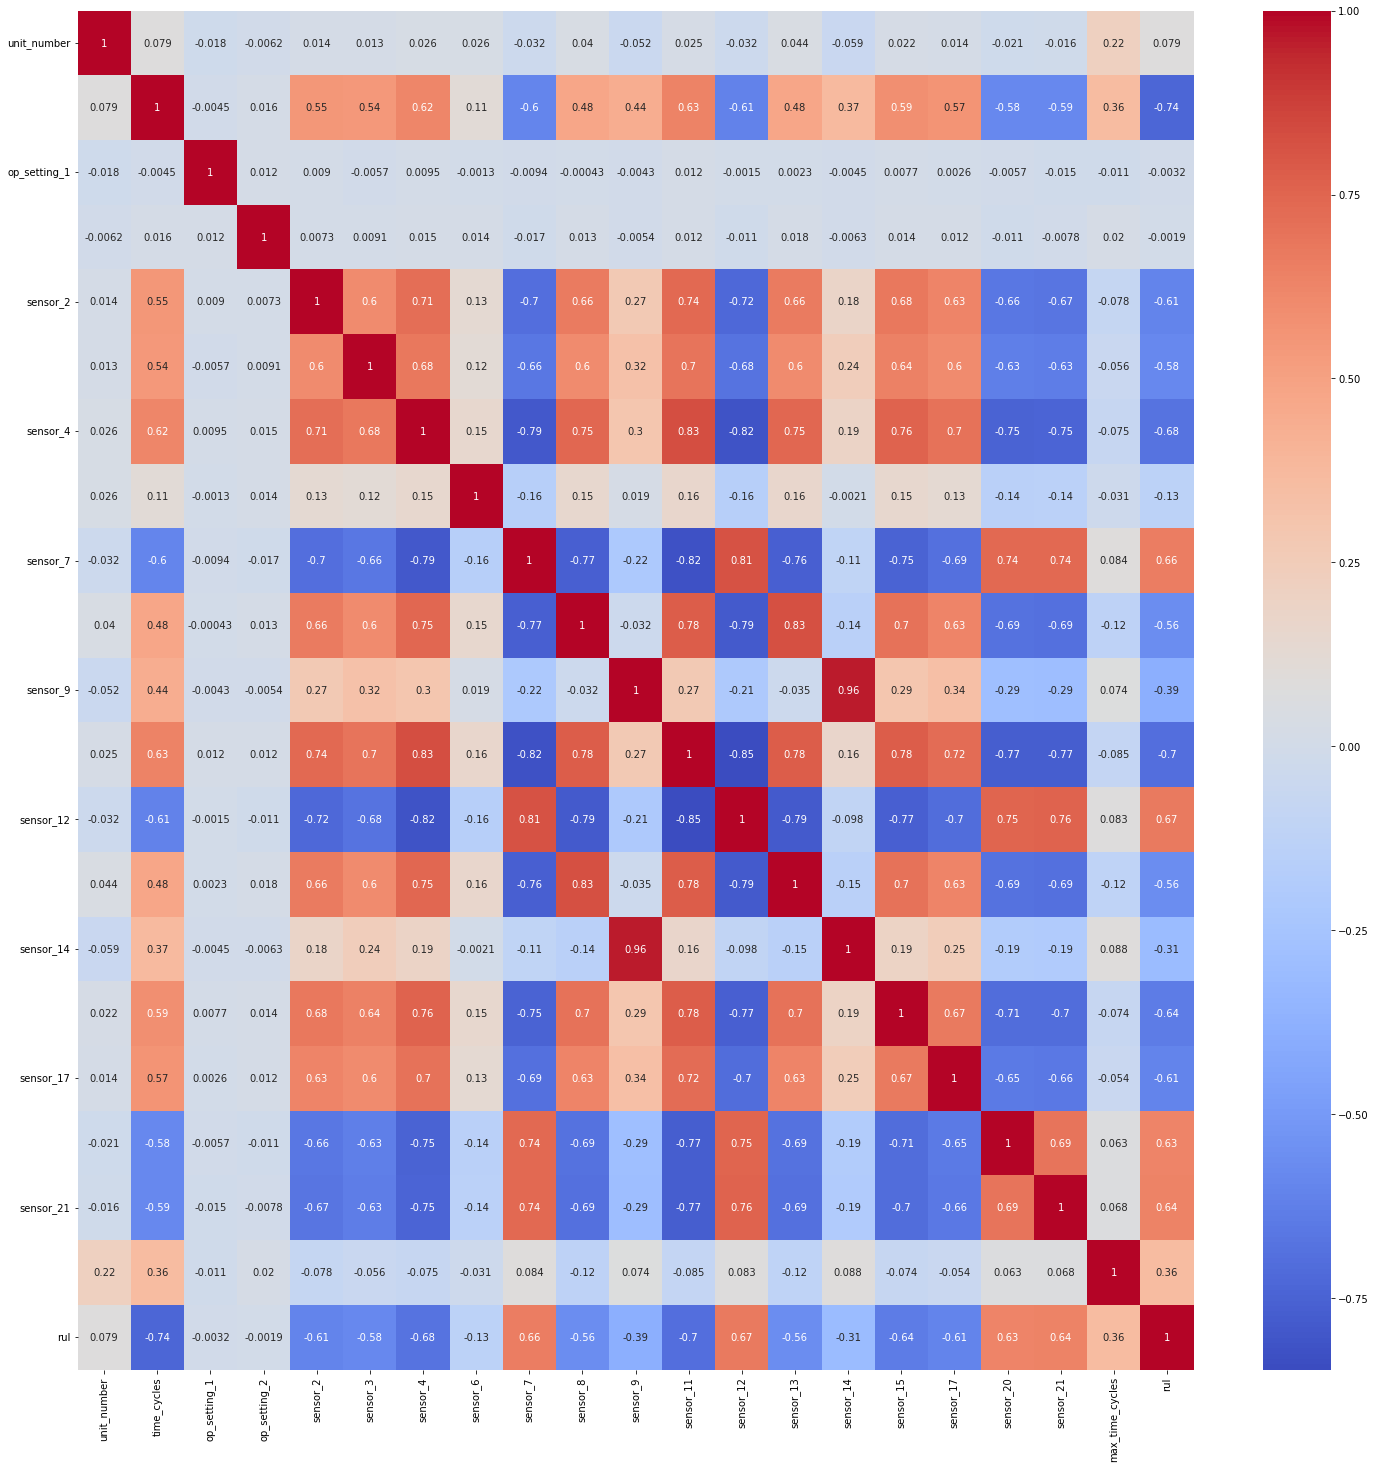

In [40]:
sns.heatmap(df_train.corr(),annot=True, cmap="coolwarm")
fig=plt.gcf()
fig.set_size_inches(25,25)
plt.show()